In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import PIL
import os

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [28]:
# Read and split data
batch_size = 1
img_height = 519
img_width = 695
data_dir = 'labeled_sets/labeled_blo'

test_ds = keras.utils.image_dataset_from_directory(
  data_dir, 
  batch_size=batch_size, 
  image_size=(img_height, img_width)
)


Found 1477 files belonging to 2 classes.


In [29]:
class_names = test_ds.class_names
num_classes = len(class_names)

In [30]:
model = tf.keras.models.load_model("trained_model/all40")

# Re-evaluate the model
loss, acc = model.evaluate(test_ds, verbose=2)
print("Accuracy: {:5.2f}%".format(100 * acc))

2023-04-13 21:27:57.197043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1477]
	 [[{{node Placeholder/_4}}]]
2023-04-13 21:27:57.197763: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1477]
	 [[{{node Placeholder/_0}}]]


1477/1477 - 12s - loss: 3.5440 - accuracy: 0.5362 - 12s/epoch - 8ms/step
Accuracy: 53.62%


In [39]:
labels = []
predictions = []
# count = 0
for x, y in test_ds:
    pred = np.argmax(model(x))
    predictions.append(pred)
    labels.append(y.numpy()[0])
    # if (y.numpy()[0] != pred):
    #     if pred == 1:
    #         tf.keras.preprocessing.image.save_img('./wrong/clearPredCloudy/' + str(count) + '.png', x[0])
    #     else:
    #         tf.keras.preprocessing.image.save_img('./wrong/cloudyPredClear/' + str(count) + '.png', x[0])
    #     count = count + 1


In [32]:
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       747
           1       0.98      0.12      0.21       730

    accuracy                           0.56      1477
   macro avg       0.76      0.56      0.46      1477
weighted avg       0.75      0.56      0.46      1477



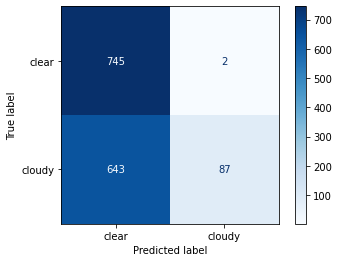

In [33]:
ConfusionMatrixDisplay.from_predictions(labels, predictions, cmap=plt.cm.Blues, display_labels=class_names )